# Queremos saber si el dinero hace más feliz a las personas: ¿?¿?¿? y tú que piensas :-)))

Although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in datasets/lifesat.

In [4]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [5]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
import urllib.request

# Download the data

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)


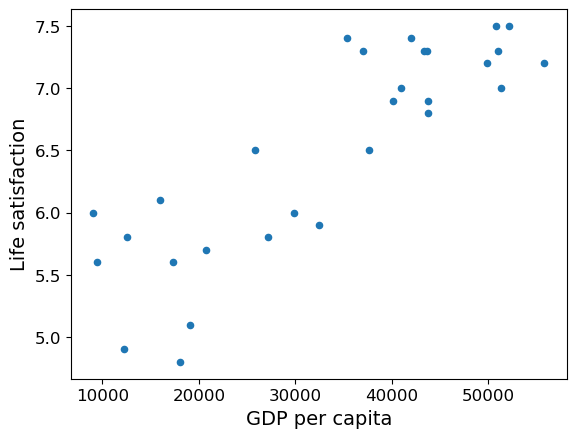

In [7]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Podemos observar que el número de puntos que se muestra en la gráfica corresponden al número de filas de las varianles x e y

In [8]:
# A partir de este punto selecciona el modelo a utilizar y aplica el entrenamiento
# Select a linear model
model = sklearn.linear_model.LinearRegression(positive=False)

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus - quedando el resultado impreso debajo de la gráfica
X_new = [[22587]]  # Cyprus' GDP per capita - Este valor no está dentro de los datos de entrenamiento utilizados
print("Nivel de satisfacción predicho: " + str(model.predict(X_new))) # outputs [[ 5.96242338]]

# De hecho podemos probar a pasar cualquier valor al modelo para conocer su valor de predicción
X_new = [[30000]]  # Valor de prueba - Este valor no está dentro de los datos de entrenamiento utilizados
print("Nivel de satisfacción predicho: " + str(model.predict(X_new)))



Nivel de satisfacción predicho: [[5.96242338]]
Nivel de satisfacción predicho: [[6.32651618]]


In [9]:
# Este bloque ha sido añadido por Salvador, copiando y pegando código de los fuentes en github
# https://github.com/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb
#
# Una pregunta ¿qué quiere decir que los puntos están cerca de la linea que deteriman el modelo?
# Respuesta: El modelo están pintando una recta donde la distancia de los puntos sea mínima entre los puntos y la recta
#            Aquí lo que nos interesa es observar la tendencia.
# Una de las conclusiones que se puede observar es que cuanto mayor es la renta percápita entonces mayor es la Satisfacción de vida

sample_data =  country_stats

from sklearn import linear_model
lin1 = linear_model.LinearRegression(positive=False)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]

# Al entrenarlo encuentra los parámetros que mejor se ajustan a los datos de muestra que se utilizan
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]



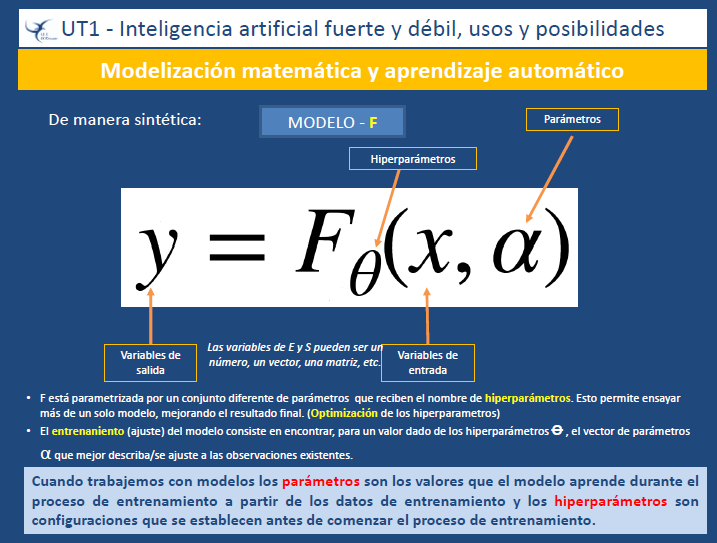

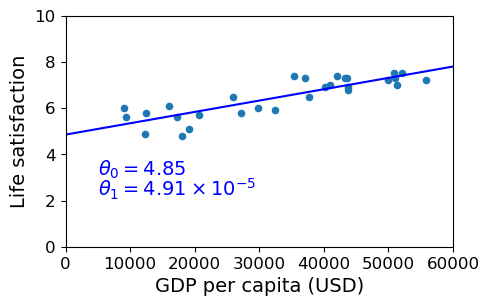

In [10]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
#Duda: Aclara cómo ha obtenido estos dos valores de los parámetros theta_0 y theta_1
#Respuesta: Son los valores de las variables t0 y t1, obtenidas después de entrenar el modelo.
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.show()